In [26]:
import platform
import PIL  # Pillow 包通常在 Python 中以 PIL 名称导入
import jupyterlab
import matplotlib
import ipympl
import numpy as np
import pandas as pd

# 打印 Python 版本
print("Python version:", platform.python_version())

# 打印 Pillow 版本
print("Pillow version:", PIL.__version__)

# 打印 JupyterLab 版本
print("JupyterLab version:", jupyterlab.__version__)

# 打印 matplotlib 版本
print("matplotlib version:", matplotlib.__version__)

# 打印 ipympl 版本
print("ipympl version:", ipympl.__version__)


# Python version: 3.10.16
# Pillow version: 11.1.0
# JupyterLab version: 4.3.5
# matplotlib version: 3.10.0
# ipympl version: 0.9.6


Python version: 3.10.16
Pillow version: 11.1.0
JupyterLab version: 4.3.5
matplotlib version: 3.10.0
ipympl version: 0.9.6


In [27]:
from openflow import InteractivePolygonGating, InteractiveHistogramThreshold

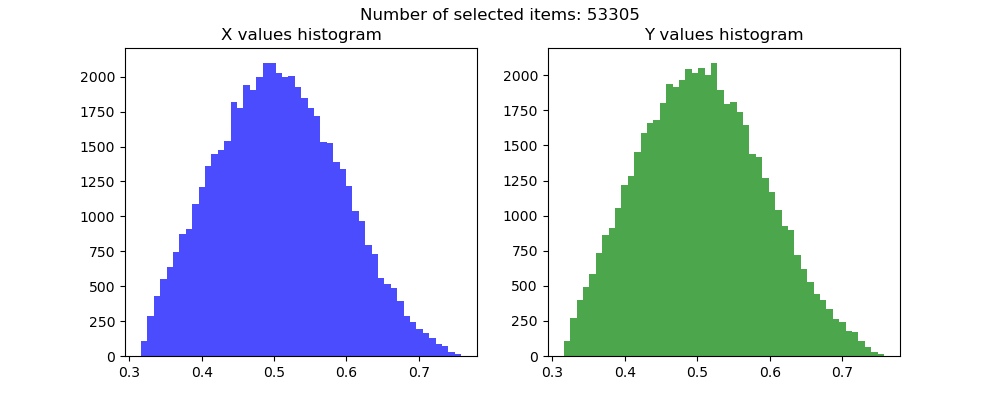

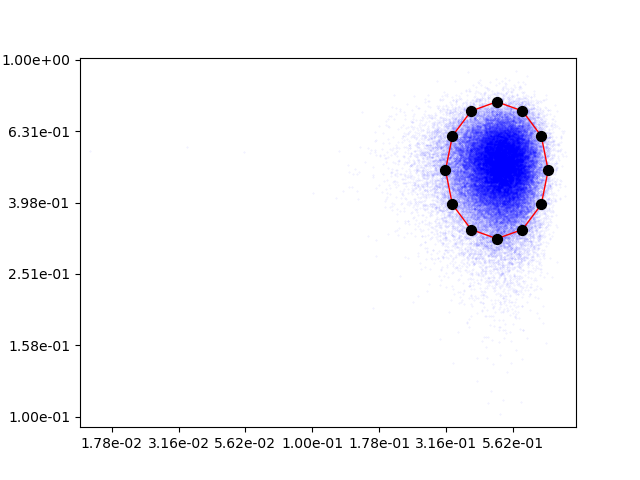

In [36]:
# Example usage:
if __name__ == "__main__":
    np.random.seed(0)
    # Generate sample data using normal distribution
    data = {
        'x': np.random.normal(0.5, 0.1, 60000),
        'y': np.random.normal(0.5, 0.1, 60000)
    }
    df = pd.DataFrame(data)

    # Create an instance of InteractivePolygonGating with 5 vertices and logarithmic scale enabled.
    gate1 = InteractivePolygonGating(df, 'x', 'y', num_edges=12, log=True)
    # As you drag the polygon the histograms and scatter plot will update.



          FSC-H         FSC-A         SSC-H         SSC-A        FL5-H  \
0  3.809595e+06  2.477391e+07  4.462111e+06  2.388381e+07  1115.900024   
1  3.560230e+06  7.536824e+06  3.112974e+06  4.911494e+06  1332.900024   
2  7.482157e+05  5.051149e+05  4.738253e+05  3.529944e+05  1008.000000   
3  2.815433e+06  4.244122e+06  1.545921e+06  1.840636e+06  1029.900024   
4  3.255092e+06  6.020094e+06  3.895188e+06  5.147354e+06   782.599976   

         FL5-A      FL11-H      FL11-A        FL8-H         FL8-A  \
0  1210.300049  413.500000  362.600006  7368.200195  15690.599609   
1   268.500000  295.799988  180.800003   475.399994    524.400024   
2    98.699997  155.600006   10.900000   625.299988    338.700012   
3  -104.300003  376.500000  -56.599998   657.299988    354.799988   
4   126.699997  198.199997   42.000000   600.599976    465.700012   

     FSC-Width   Time  
0  6659.107910    0.0  
1  2167.759033    8.0  
2   691.300720    9.0  
3  1543.628296   39.0  
4  1893.827881  144.

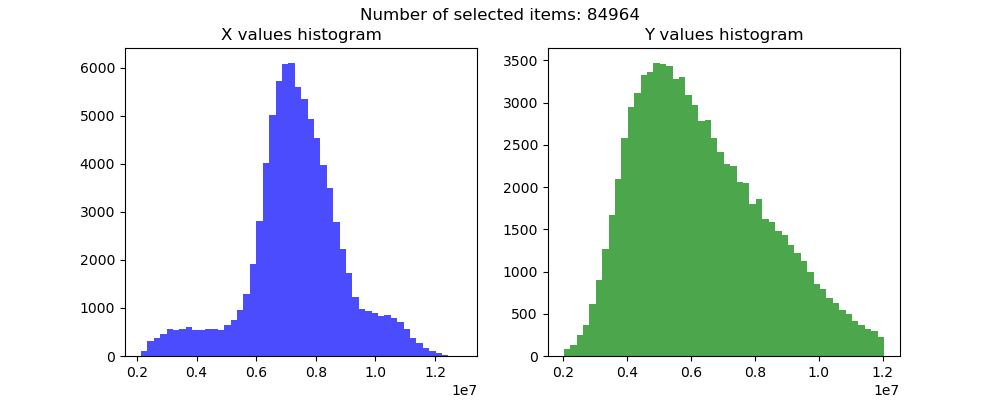

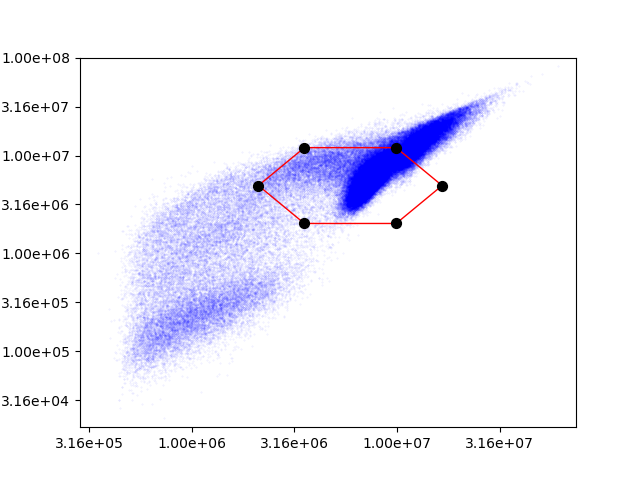

In [37]:

import FlowCal
import pandas as pd

# Read the .facs file
file_path = r'/Users/mingzhchen/Documents/GitHub/cytoflex/data/Exp_20250219/Exp_20240417_S2/01-Well-A1.fcs'
data = FlowCal.io.FCSData(file_path)

# Convert to a pandas DataFrame
df = pd.DataFrame(data, columns=data.channels)
print(df.head())

# Filter the DataFrame

filtered_df = df[(df['FSC-A'] > 0) & (df['SSC-A'] > 0)]

# selector = InteractivePolygonSelector(df, 'FSC-A', 'SSC-A', num_edges=5, log_log=True)
gate1 = InteractivePolygonGating(filtered_df, 'FSC-A', 'SSC-A', num_edges=6, log=True)


In [30]:
df2 = gate1.selected_data
print(df2.head())

        FSC-H       FSC-A       SSC-H        SSC-A        FL5-H        FL5-A  \
0  3809595.00  24773910.0  4462111.00  23883808.00  1115.900024  1210.300049   
1  3560230.00   7536824.5  3112973.50   4911494.50  1332.900024   268.500000   
4  3255092.50   6020094.5  3895187.75   5147354.00   782.599976   126.699997   
5  3260507.75   6739660.5  2846413.75   4126506.25   866.500000   347.700012   
6  4058960.00  12639209.0  4801516.50  11360238.00  1107.300049   858.700012   

       FL11-H      FL11-A        FL8-H         FL8-A    FSC-Width   Time  
0  413.500000  362.600006  7368.200195  15690.599609  6659.107910    0.0  
1  295.799988  180.800003   475.399994    524.400024  2167.759033    8.0  
4  198.199997   42.000000   600.599976    465.700012  1893.827881  144.0  
5  344.200012  180.000000   507.399994    574.900024  2116.670166  154.0  
6  427.500000  294.100006   749.000000   2047.500000  3188.636719  174.0  


Number of selected items: 1


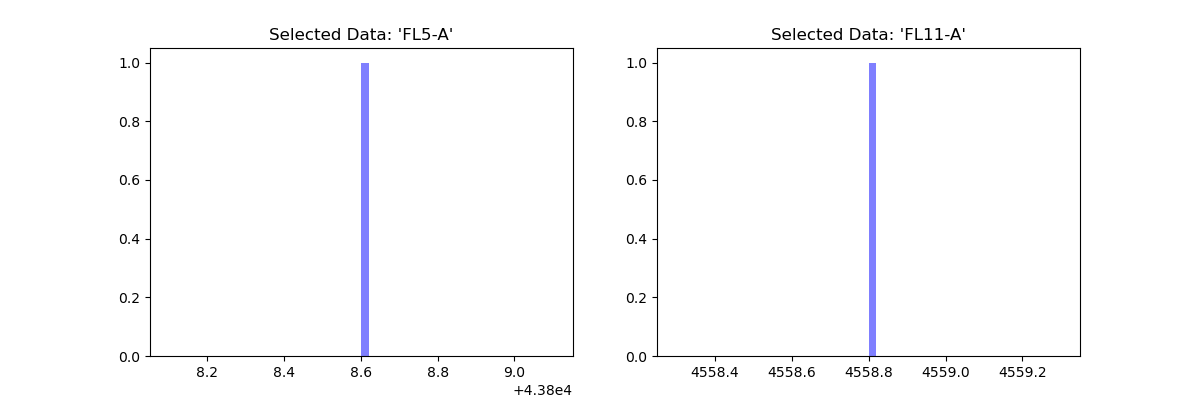

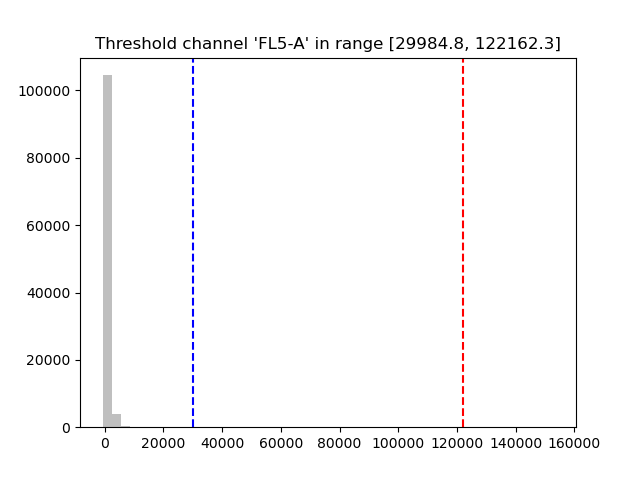

In [31]:
gate2 = InteractiveHistogramThreshold(
    data=df2,
    threshold_channel='FL5-A',
    plot_channels=['FL5-A','FL11-A']
)

In [32]:
df3 = gate2.selected_data
df3

,FSC-H,FSC-A,SSC-H,SSC-A,FL5-H,FL5-A,FL11-H,FL11-A,FL8-H,FL8-A,FSC-Width,Time
797,4021606.50,28188354.0,5646246.5,46535128.0,9111.299805,17180.599609,1236.300049,2456.699951,5.369005e+06,8.950156e+06,7177.460449,29235.0
6401,4066613.25,15473604.0,5641063.5,23316574.0,6755.299805,12345.900391,353.200012,64.500000,3.979842e+06,9.912888e+06,3896.360107,147665.0
10112,4024568.00,14570425.0,5650092.5,25086986.0,34613.898438,43808.601562,2743.600098,4558.799805,2.639500e+04,3.986170e+04,3707.266113,239018.0
12802,4069972.50,13962499.0,5639472.5,20995688.0,7524.700195,13589.900391,497.799988,571.099976,5.688447e+06,1.630470e+07,3512.951172,300826.0
19108,4164501.00,16349027.0,5618109.0,20125640.0,10709.000000,12029.200195,278.299988,-55.599998,1.937648e+06,2.547467e+06,4020.031006,464338.0
22896,4103218.25,21869488.0,5640860.5,31575544.0,7597.899902,14562.400391,636.000000,1150.400024,2.358304e+06,6.199067e+06,5457.756836,543612.0
29806,4104109.25,10618622.0,5641116.5,17928800.0,14584.500000,22448.800781,1313.300049,2233.399902,1.286080e+04,2.252750e+04,2649.413574,677733.0
36241,4115206.00,20620196.0,5636473.0,28840636.0,10707.900391,13431.900391,736.099976,953.799988,8.061648e+05,1.194859e+06,5130.997559,784625.0
39485,4093963.00,12904951.0,5639435.0,22039786.0,13471.700195,15555.500000,490.500000,678.000000,3.922461e+06,5.480035e+06,3227.845215,842218.0
43987,4079058.50,15758216.0,5631676.0,22212026.0,10791.599609,12568.900391,291.299988,96.900002,3.211616e+06,5.678370e+06,3955.918457,944758.0


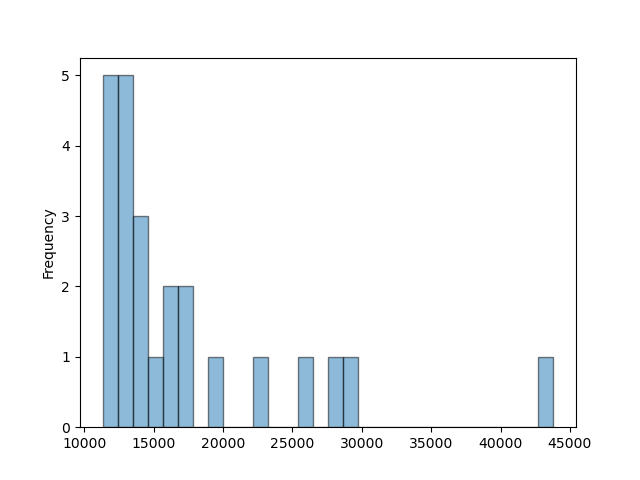

In [33]:
import matplotlib.pyplot as plt
# histogram plot FL5-A channel
plt.figure()
df3["FL5-A"].plot.hist(bins=30, alpha=0.5, edgecolor='black')
plt.show()

        FSC-H      FSC-A       SSC-H      SSC-A        FL5-H        FL5-A  \
0  3408876.00  7104059.5  2951395.50  4041013.5  1195.500000   189.199997   
1  3797404.75  8366968.5  5465026.00  7927780.5  1579.400024  1211.500000   
2  3132632.25  4549638.5  3940678.25  5950856.0  1002.000000   192.699997   
3  3182707.50  6242210.0  2845738.00  4065816.0   975.700012    -5.100000   
5  3574938.25  7525374.5  4610270.50  6815633.0   752.000000   478.299988   

       FL11-H      FL11-A         FL8-H         FL8-A    FSC-Width   Time  
0  217.300003  141.300003  27082.500000  42914.300781  2134.007080    0.0  
1  391.200012   67.300003    856.799988   1266.400024  2256.221436   25.0  
2  319.100006   38.000000    677.500000    974.500000  1487.193115   88.0  
3  158.699997    0.500000   2670.199951   3237.300049  2008.362427   89.0  
5  183.199997 -381.100006   8900.500000  11224.299805  2155.558350  209.0  


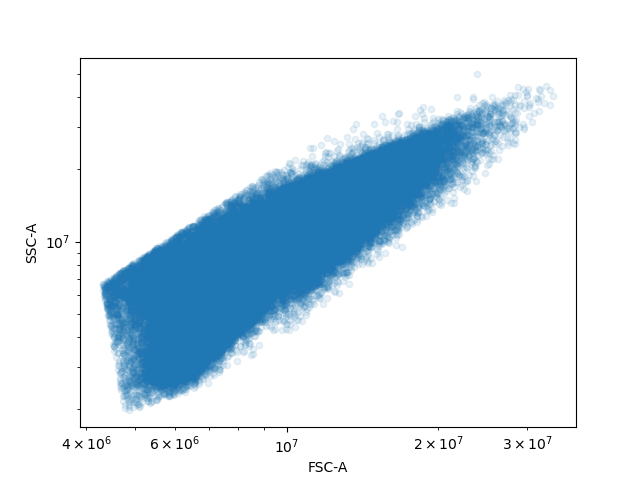

In [34]:
# Load another .fcs file
another_file = r'/Users/mingzhchen/Documents/GitHub/cytoflex/data/Exp_20250219/Exp_20240417_S2/01-Well-A2.fcs'

another_data = FlowCal.io.FCSData(another_file)


# Convert to a pandas DataFrame
another_df = pd.DataFrame(another_data, columns=another_data.channels)
another_filtered_df = another_df[(another_df['FSC-A'] > 0) & (another_df['SSC-A'] > 0)]

another_subdate =gate1.apply_gate(another_filtered_df)
print(another_subdate.head())
another_subdate.plot.scatter(x='FSC-A', y='SSC-A', alpha=0.1)
# Make log plot
plt.xscale('log')
plt.yscale('log')

Applied gate to new data. Selected 426 out of 155184 items.
             FSC-H       FSC-A      SSC-H       SSC-A         FL5-H  \
212     4060937.00  14209618.0  5648263.0  21178690.0   6318.399902   
468     4068331.25  14839706.0  5649070.5  22456950.0   7423.500000   
684     4046988.50  18457178.0  5528384.0  22821136.0   4198.200195   
839     3906822.75  10119602.0  5647510.5  12898406.0  13304.200195   
927     4028548.00  12788914.0  5622883.5  13942081.0  11394.099609   
...            ...         ...        ...         ...           ...   
185730  3646590.75   7928149.0  5611808.0   9328105.0   9177.099609   
186259  4078317.00  13194534.0  5639941.5  19670900.0  12177.400391   
186464  3912330.25  10429857.0  5639698.5  15328021.0   9848.200195   
186610  3688722.50   7775168.0  5637383.5  11345880.0   9224.599609   
186909  4117418.25  15775139.0  5638706.5  20861468.0   8952.200195   

               FL5-A       FL11-H       FL11-A        FL8-H        FL8-A  \
212     126

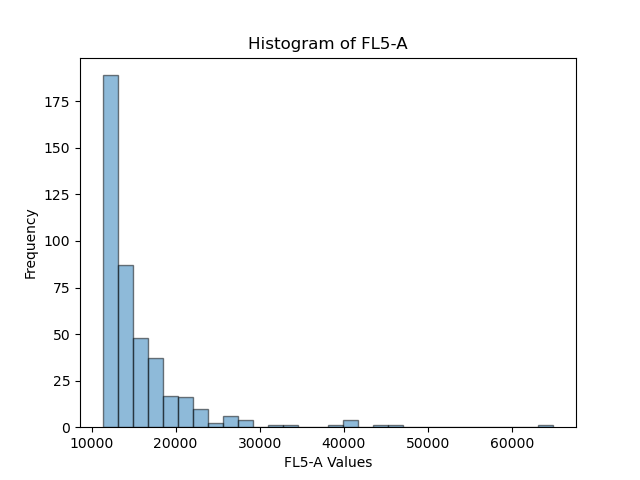

In [35]:
another_subdate_hist = gate2.apply_gate(another_subdate)
print(another_subdate_hist)
plt.figure()
another_subdate_hist["FL5-A"].plot.hist(bins=30, alpha=0.5, edgecolor='black')
plt.title('Histogram of FL5-A')
plt.xlabel('FL5-A Values')
plt.ylabel('Frequency')
plt.show()